In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

Link to Dataset - https://www.kaggle.com/therohk/million-headlines

### Understanding the Tfidftransformer usage

In [2]:
docs=["A video of government workers in Puducherry hurriedly throwing the body of a COVID positive man into a pit has caused massive outrage, prompting the administration to order a probe into the incident.",
      "The COVID pandemic has hit the world and the Vedanta Group business. It has incurred losses in oil, gas and mining sectors.",
      "Yuvraj Singh was diagnosed with a cancerous tumor in his left lung following India's World Cup triumph in 2011. He had scored 362 runs and claimed 15 wickets in the tournament and was bestowed with the Player of the Tournament award in the end"
     ]

In [3]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
 

In [4]:
word_count_vector.shape

(3, 67)

In [7]:
word_count_vector.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0],
       [0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0],
       [1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 4, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1,
        1]], dtype=int64)

### TfidfTransformer
Transform a count matrix to a normalized tf or tf-idf representation

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [8]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tf_idf_vector = tfidf_transformer.fit_transform(word_count_vector)

In [9]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
into,0.365400
the,0.323717
of,0.277896
outrage,0.182700
puducherry,0.182700
...,...
it,0.000000
left,0.000000
2011,0.000000
lung,0.000000


---

## PLSA on "abcnews'' Dataset

In [10]:
df=pd.read_csv('abcnews-date-text.csv',error_bad_lines=False)

In [11]:
df.head(20)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [12]:
data_text = df[['headline_text']].astype('str')

In [13]:
data_text.shape

(1186018, 1)

In [14]:
data_text=data_text.loc[1:100000,:]

In [15]:
data_text.shape

(100000, 1)

In [17]:
stopw=stopwords.words('english')
stopw
def stopwords_remove(x):
    terms=x.split()
    terms=[w for w in terms if w not in stopw]
    sentence=' '.join(terms)
    return sentence
data_text['Refined_headlines']=data_text['headline_text'].apply(lambda x: stopwords_remove(x))

In [18]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text['Word_Count']=data_text['headline_text'].apply(lambda x: word_count(x))

In [19]:
data_text.head()

,headline_text,Refined_headlines,Word_Count
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,8
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit,7
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,9
4,air nz strike to affect australian travellers,air nz strike affect australian travellers,7
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump,5


In [20]:
data_text['Word_Count'].describe()

count    100000.000000
mean          6.317600
std           1.314324
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          12.000000
Name: Word_Count, dtype: float64

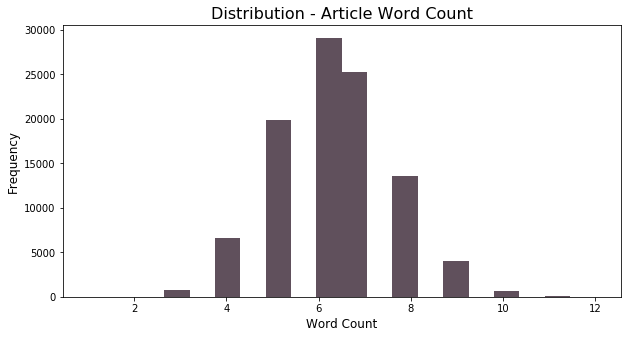

In [21]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    data_text['Word_Count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.show()

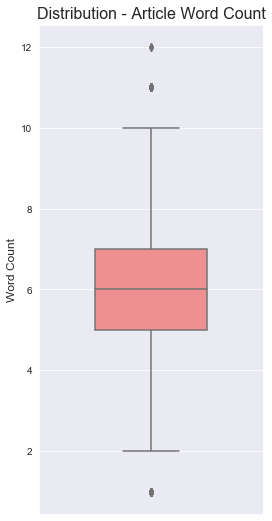

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure(figsize=(4,9))

sns.boxplot(
    data_text['Word_Count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)

plt.show()

In [23]:
headline_sentences=[''.join(text) for text in data_text['Refined_headlines']]

In [24]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(headline_sentences)

In [25]:
x_counts

<100000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 449845 stored elements in Compressed Sparse Row format>

In [26]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [27]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 449845 stored elements in Compressed Sparse Row format>

In [28]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [29]:
#number of topics
num_topics=10
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [31]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict)

In [32]:
get_nmf_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,police,us,man,govt,new,council,dies,says,water,plan
1,probe,iraq,charged,urged,zealand,considers,crash,report,back,group
2,investigate,killed,court,nsw,laws,rejects,car,pm,call,support
3,missing,troops,murder,vic,president,land,woman,iraq,cup,residents
4,search,iraqi,face,wa,hospital,backs,killed,minister,world,backs
5,death,war,jailed,qld,chief,seeks,hospital,mp,fire,rejects
6,shooting,baghdad,charges,sa,york,merger,accident,war,win,development
7,hunt,soldier,charge,accused,deal,approves,two,chief,boost,mayor
8,fatal,soldiers,stabbing,fed,centre,consider,road,opposition,set,welcomes
9,seek,attack,missing,local,mayor,decision,aged,bush,australia,concerns
